# Coffee Shop Sales #
## Source: https://www.kaggle.com/datasets/ahmedabbas757/coffee-sales/data ##
 - How have Maven Roasters sales trended over time?
 - Which days of the week tend to be busiest, and why do you think that's the case?
 - Which products are sold most and least often? Which drive the most revenue for the business?

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df = pd.read_excel("C:\\Users\\benwa\\OneDrive\\Documents\\Projects\\Coffee Shop Sales.xlsx")
df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [9]:
df.isnull().sum()

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 12.5+ MB


In [13]:
df['transaction_time'] = df['transaction_time'].astype(str)
df['transaction_time']= pd.to_timedelta(df['transaction_time'])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype          
---  ------            --------------   -----          
 0   transaction_id    149116 non-null  int64          
 1   transaction_date  149116 non-null  datetime64[ns] 
 2   transaction_time  149116 non-null  timedelta64[ns]
 3   transaction_qty   149116 non-null  int64          
 4   store_id          149116 non-null  int64          
 5   store_location    149116 non-null  object         
 6   product_id        149116 non-null  int64          
 7   unit_price        149116 non-null  float64        
 8   product_category  149116 non-null  object         
 9   product_type      149116 non-null  object         
 10  product_detail    149116 non-null  object         
dtypes: datetime64[ns](1), float64(1), int64(4), object(4), timedelta64[ns](1)
memory usage: 12.5+ MB


In [17]:
# total sales
df['sales'] = df['transaction_qty'] * df['unit_price']

In [21]:
#Datetime
df['datetime'] = df['transaction_date'] + df['transaction_time']

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype          
---  ------            --------------   -----          
 0   transaction_id    149116 non-null  int64          
 1   transaction_date  149116 non-null  datetime64[ns] 
 2   transaction_time  149116 non-null  timedelta64[ns]
 3   transaction_qty   149116 non-null  int64          
 4   store_id          149116 non-null  int64          
 5   store_location    149116 non-null  object         
 6   product_id        149116 non-null  int64          
 7   unit_price        149116 non-null  float64        
 8   product_category  149116 non-null  object         
 9   product_type      149116 non-null  object         
 10  product_detail    149116 non-null  object         
 11  sales             149116 non-null  float64        
 12  datetime          149116 non-null  datetime64[ns] 
dtypes: datetime64[ns](2), float64(2), int64(4), 

In [25]:
df.describe()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,product_id,unit_price,sales,datetime
count,149116.000000,149116,149116,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000,149116
mean,74737.371872,2023-04-15 11:50:32.173609984,0 days 12:14:15.815794415,1.438276,5.342063,47.918607,3.382219,4.686367,2023-04-16 00:04:47.989404160
min,1.000000,2023-01-01 00:00:00,0 days 06:00:00,1.000000,3.000000,1.000000,0.800000,0.800000,2023-01-01 07:06:11
25%,37335.750000,2023-03-06 00:00:00,0 days 09:05:10.500000,1.000000,3.000000,33.000000,2.500000,3.000000,2023-03-06 13:37:08
50%,74727.500000,2023-04-24 00:00:00,0 days 11:15:28,1.000000,5.000000,47.000000,3.000000,3.750000,2023-04-24 08:24:32.500000
75%,112094.250000,2023-05-30 00:00:00,0 days 15:25:57,2.000000,8.000000,60.000000,3.750000,6.000000,2023-05-30 07:16:13
max,149456.000000,2023-06-30 00:00:00,0 days 20:59:32,8.000000,8.000000,87.000000,45.000000,360.000000,2023-06-30 20:57:19
std,43153.600016,NaN,0 days 03:45:57.901686173,0.542509,2.074241,17.930020,2.658723,4.227099,NaN


In [31]:
#find different sales in each of the location

df_location = df.groupby('store_location').agg({
    'sales': 'sum',
    'transaction_id' : 'count'
})
df_location

,sales,transaction_id
store_location,,
Astoria,232243.91,50599
Hell's Kitchen,236511.17,50735
Lower Manhattan,230057.25,47782


In [33]:
df_location_sorted = df_location.sort_values(by='sales', ascending=False)
df_location_sorted

,sales,transaction_id
store_location,,
Hell's Kitchen,236511.17,50735
Astoria,232243.91,50599
Lower Manhattan,230057.25,47782


In [35]:
daily_sales_by_location = df.groupby(['transaction_date', 'store_location']) ['sales'].sum().unstack()
daily_sales_by_location

store_location,Astoria,Hell's Kitchen,Lower Manhattan
transaction_date,,,
2023-01-01,868.40,851.45,788.35
2023-01-02,925.50,828.80,649.05
2023-01-03,902.75,906.25,756.00
2023-01-04,808.25,781.65,630.20
2023-01-05,903.05,714.90,800.90
...,...,...,...
2023-06-26,1975.10,1746.10,2154.70
2023-06-27,1861.55,1676.70,2437.40
2023-06-28,1758.10,1445.85,1524.95


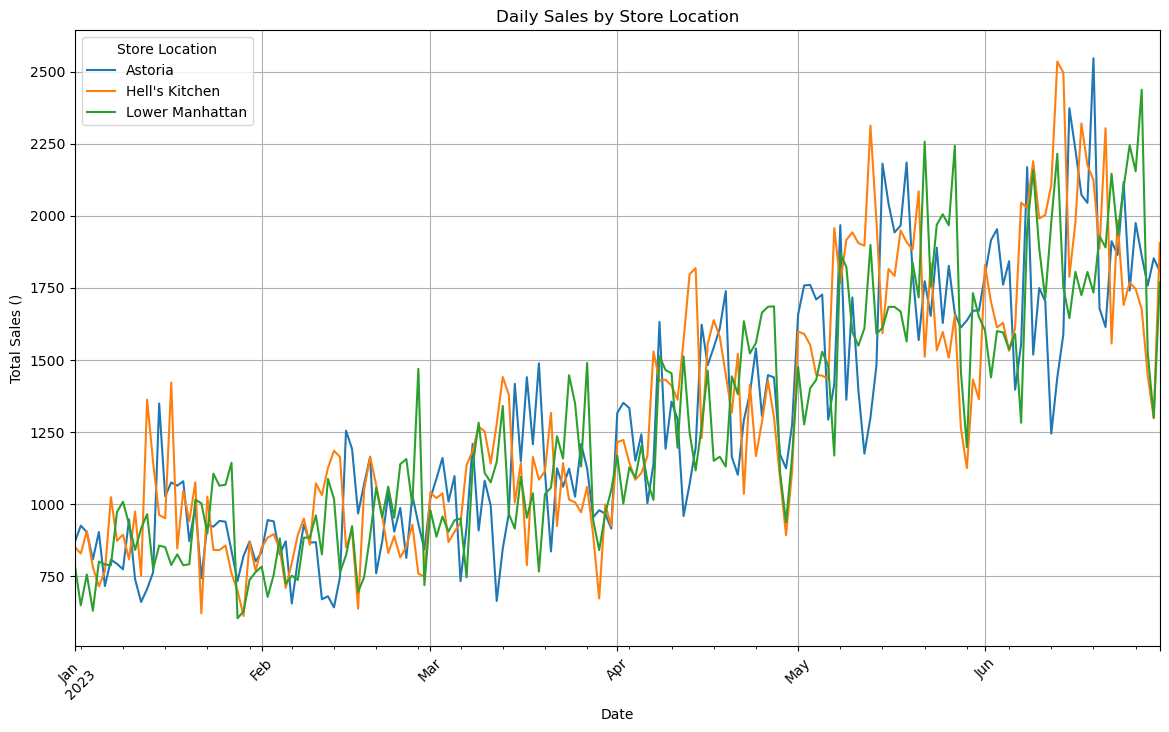

In [41]:
daily_sales_by_location.plot(figsize=(14,8), title='Daily Sales by Store Location')

plt.xlabel('Date')
plt.ylabel('Total Sales ()')
plt.legend(title='Store Location')
plt.grid(True)
plt.xticks(rotation=45)

plt.show()

In [47]:
#Find Daily Sales
daily_sales = df.groupby('transaction_date')['sales'].sum().reset_index()

In [49]:
df['day_of_week'] = df['datetime'].dt.day_name()

weekly_sales = df.groupby('day_of_week') ['sales'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).reset_index()

In [51]:
df['month'] = df['datetime'].dt.to_period('M')
monthly_sales = df.groupby('month')['sales'].sum().reset_index()

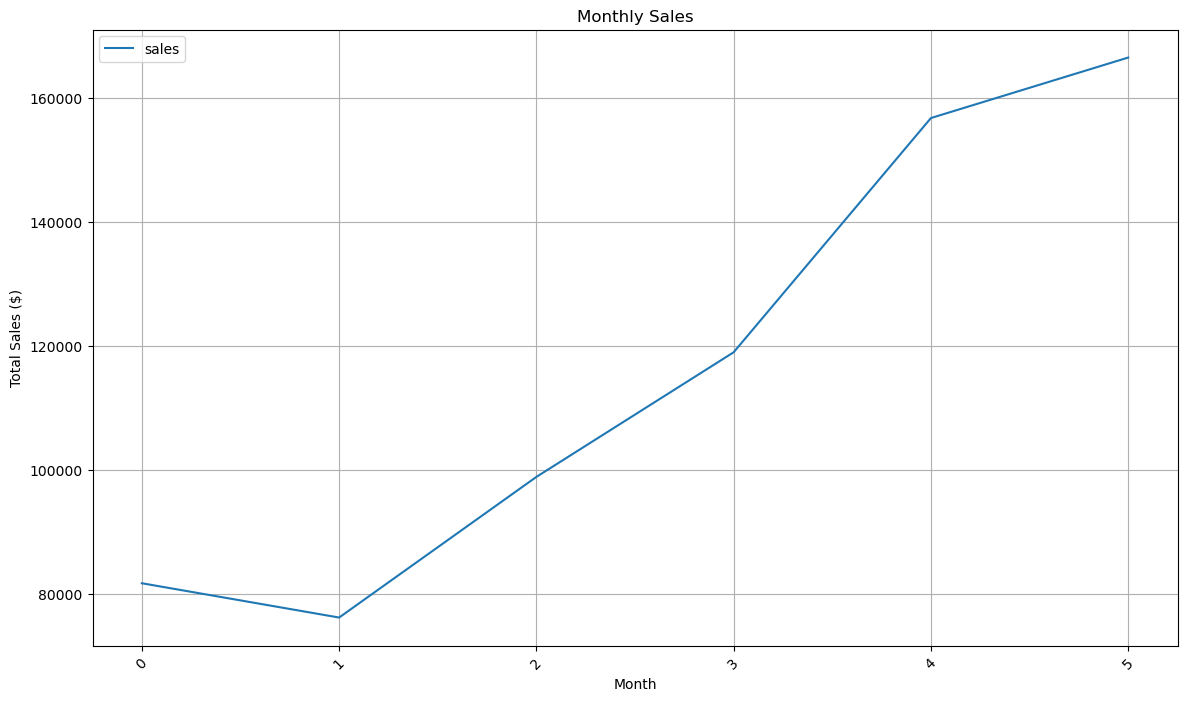

In [57]:
monthly_sales.plot(figsize=(14,8), title='Monthly Sales')

plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.grid(True)
plt.xticks(rotation=45)

plt.show()

**Question: How have Maven Roasters sales trended over time?**

Maven Roasters has experienced consistent sales growth throughout the analyzed period.

In [63]:
weekly_sales = df.groupby(['day_of_week', 'store_location'])['sales'].sum().unstack()
weekly_sales

store_location,Astoria,Hell's Kitchen,Lower Manhattan
day_of_week,,,
Friday,33472.75,34743.18,33157.07
Monday,33928.29,33389.51,34359.48
Saturday,31845.93,32599.23,32449.32
Sunday,32795.18,33685.63,31849.50
Thursday,34140.37,33468.06,33159.35
Tuesday,31816.76,34846.47,32792.71
Wednesday,34244.63,33779.09,32289.82


In [65]:
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_sales = weekly_sales.reindex(days_order)
weekly_sales

store_location,Astoria,Hell's Kitchen,Lower Manhattan
day_of_week,,,
Monday,33928.29,33389.51,34359.48
Tuesday,31816.76,34846.47,32792.71
Wednesday,34244.63,33779.09,32289.82
Thursday,34140.37,33468.06,33159.35
Friday,33472.75,34743.18,33157.07
Saturday,31845.93,32599.23,32449.32
Sunday,32795.18,33685.63,31849.50


In [126]:
weekly_sales['Total Sales'] = weekly_sales.sum(axis=1)
weekly_sales

store_location,Astoria,Hell's Kitchen,Lower Manhattan,Total Sales
day_of_week,,,,
Monday,33928.29,33389.51,34359.48,203354.56
Tuesday,31816.76,34846.47,32792.71,198911.88
Wednesday,34244.63,33779.09,32289.82,200627.08
Thursday,34140.37,33468.06,33159.35,201535.56
Friday,33472.75,34743.18,33157.07,202746.00
Saturday,31845.93,32599.23,32449.32,193788.96
Sunday,32795.18,33685.63,31849.50,196660.62


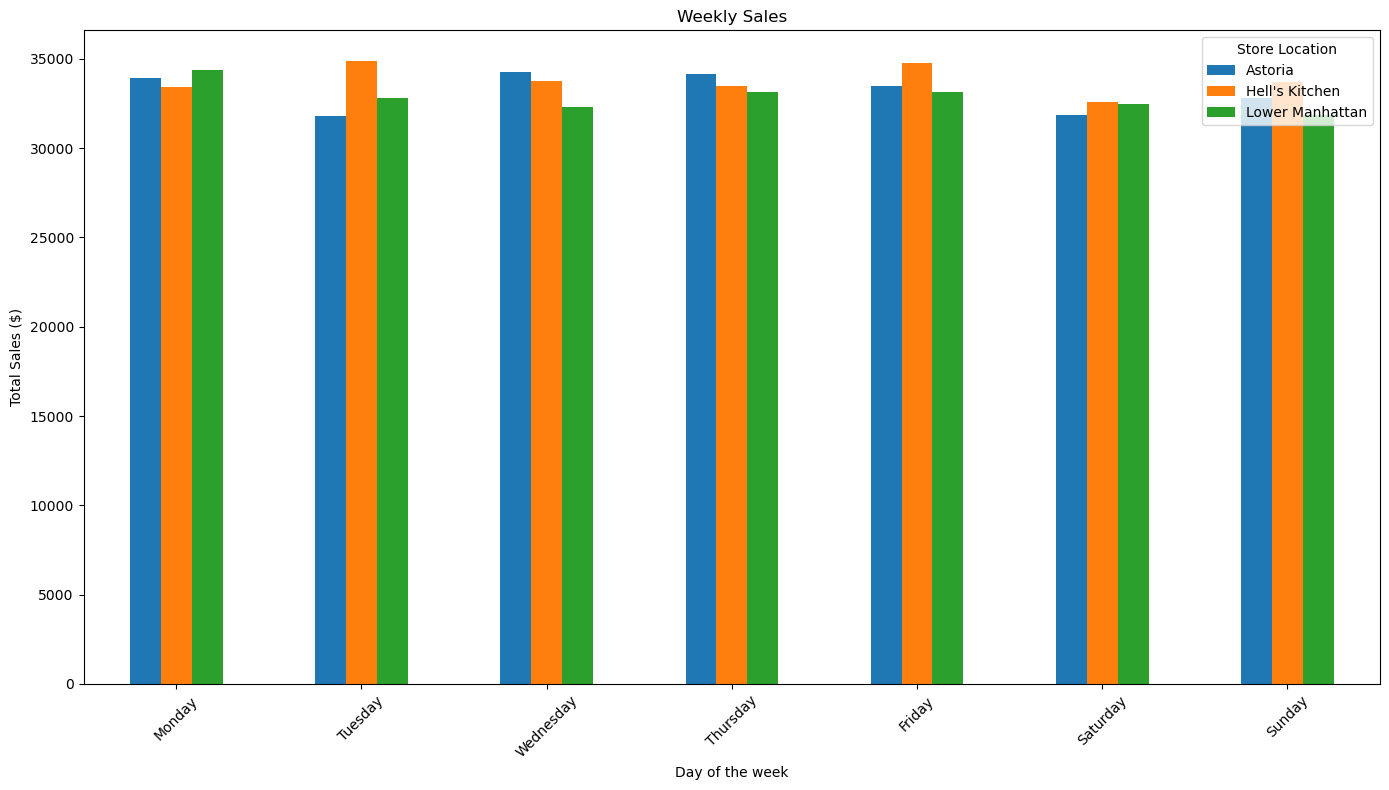

In [79]:
weekly_sales.plot(kind='bar',figsize=(14,8), title='Weekly Sales')

plt.xlabel('Day of the week')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.legend(title='Store Location', loc='upper right')
plt.tight_layout()

plt.show()

**Question 2: Which days of the week tend to be busiest, and why do you think that's the case?**
- Monday, Friday, and thursday emerge as the busiest days of the week.
- Perhaps there is a special promotion during those days. Also, Monday is the first workday of the week. People might need a little more boost after the weekend.

In [81]:
df_category = df.groupby('product_category').agg({
    'sales': 'sum',
    'transaction_id': 'count'
}).sort_values('sales', ascending = False)

df_category

,sales,transaction_id
product_category,,
Coffee,269952.45,58416
Tea,196405.95,45449
Bakery,82315.64,22796
Drinking Chocolate,72416.00,11468
Coffee beans,40085.25,1753
Branded,13607.00,747
Loose Tea,11213.60,1210
Flavours,8408.80,6790
Packaged Chocolate,4407.64,487


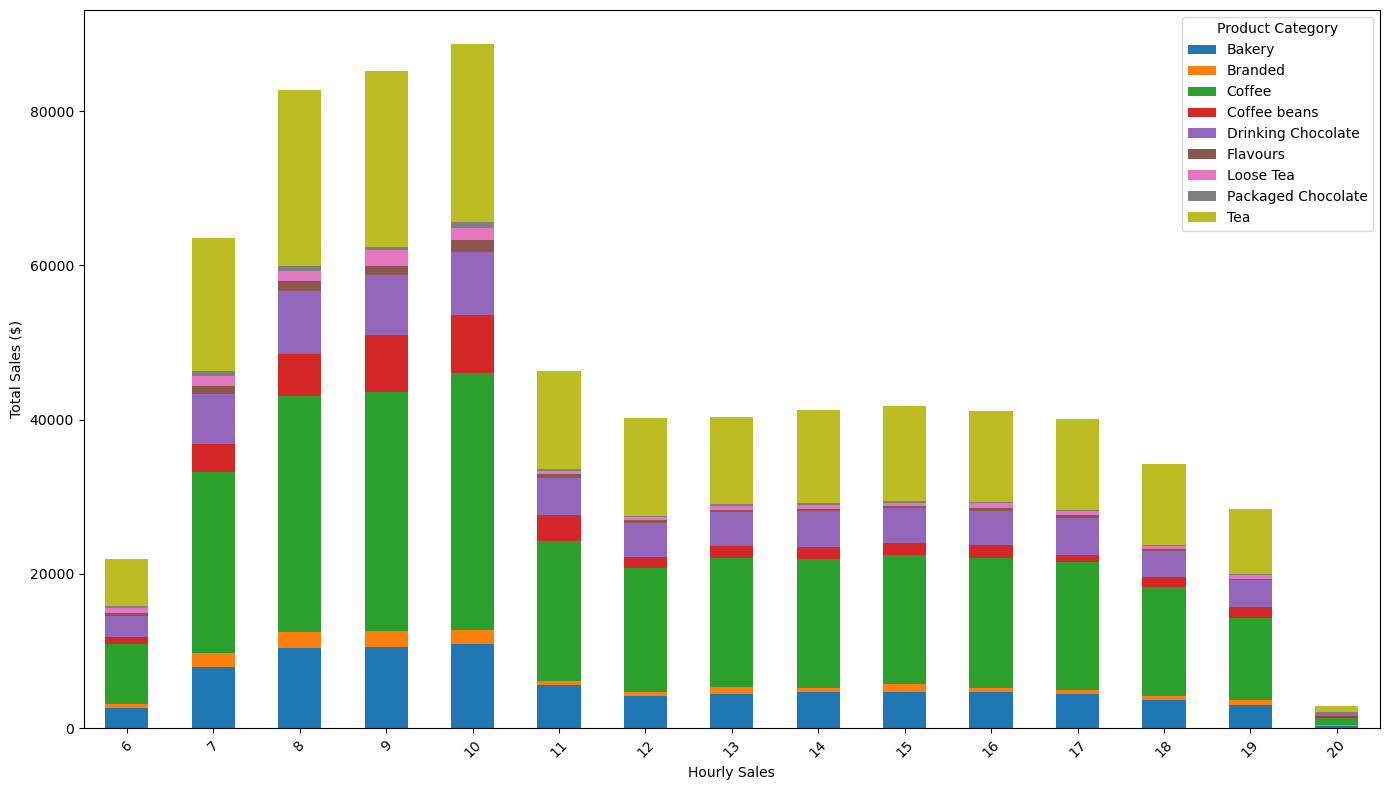

In [83]:
df['hour'] = df['datetime'].dt.hour

hourly_sales_by_product = df.groupby(['hour', 'product_category'])['sales'].sum().unstack()

hourly_sales_by_product.plot(kind='bar', stacked=True, figsize=(14, 8))

plt.xlabel('Hourly Sales')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.legend(title='Product Category', loc='upper right')
plt.tight_layout()

plt.show()

In [86]:
df_category['avg_sales'] = df_category['sales']/df_category['transaction_id']
df_category

,sales,transaction_id,avg_sales
product_category,,,
Coffee,269952.45,58416,4.621207
Tea,196405.95,45449,4.321458
Bakery,82315.64,22796,3.610969
Drinking Chocolate,72416.00,11468,6.314615
Coffee beans,40085.25,1753,22.866657
Branded,13607.00,747,18.215529
Loose Tea,11213.60,1210,9.267438
Flavours,8408.80,6790,1.238409
Packaged Chocolate,4407.64,487,9.050595


In [88]:
sales_by_product = df.groupby('product_type').agg({
    'sales': 'sum',
    'unit_price': 'mean'
}).sort_values('sales', ascending = False)

sales_by_product

,sales,unit_price
product_type,,
Barista Espresso,91406.20,3.655200
Brewed Chai tea,77081.95,2.936993
Hot chocolate,72416.00,4.148827
Gourmet brewed coffee,70034.60,2.696641
Brewed Black tea,47932.00,2.744670
Brewed herbal tea,47539.50,2.744731
Premium brewed coffee,38781.15,3.122452
Organic brewed coffee,37746.50,2.898021
Scone,36866.12,3.534638


In [94]:
# Trying to understand different types of products
product_sales_df = df.groupby(['product_category','product_type'])['sales'].sum().reset_index()

product_sales_df

,product_category,product_type,sales
0,Bakery,Biscotti,19793.53
1,Bakery,Pastry,25655.99
2,Bakery,Scone,36866.12
3,Branded,Clothing,6163.00
4,Branded,Housewares,7444.00
5,Coffee,Barista Espresso,91406.20
6,Coffee,Drip coffee,31984.00
7,Coffee,Gourmet brewed coffee,70034.60
8,Coffee,Organic brewed coffee,37746.50
9,Coffee,Premium brewed coffee,38781.15


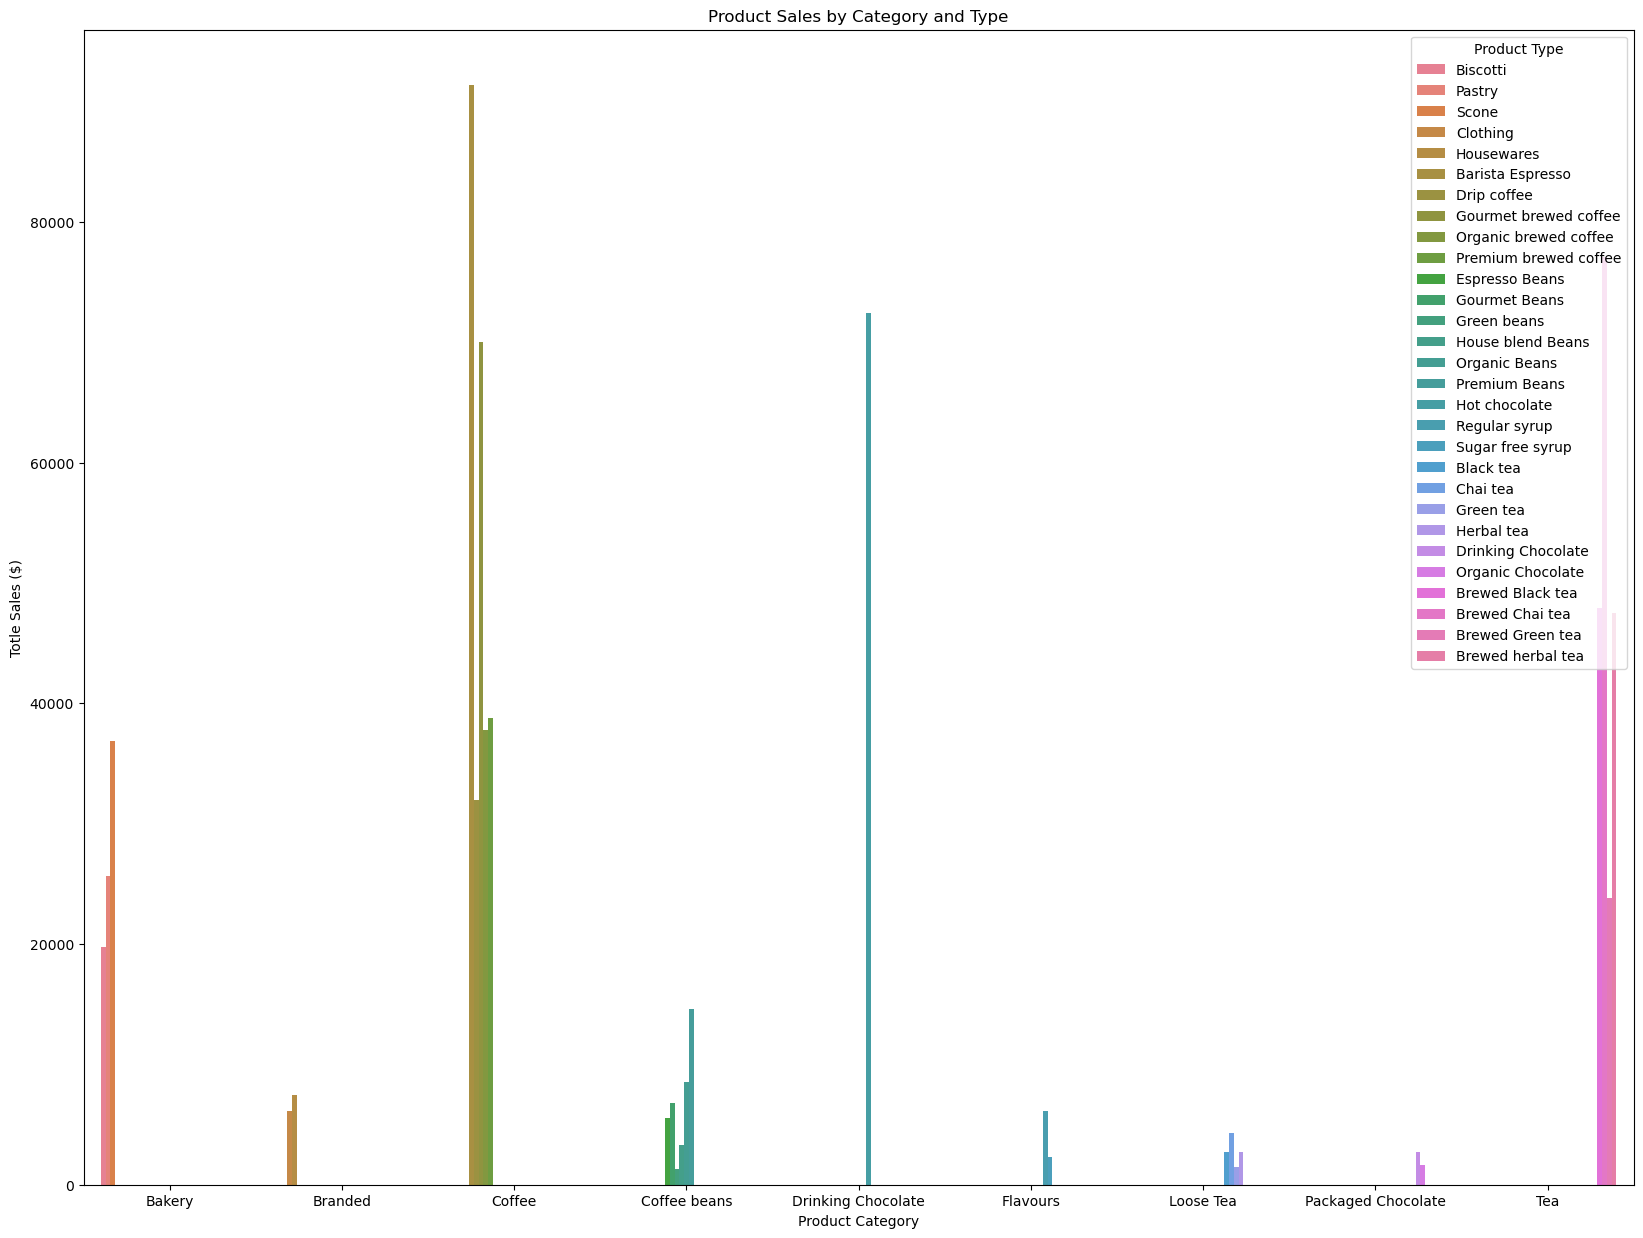

In [112]:
plt.figure(figsize=(20,15))
sns.barplot(data=product_sales_df, x='product_category', y='sales', hue='product_type')

plt.title('Product Sales by Category and Type')
plt.xlabel('Product Category')
plt.ylabel('Totle Sales ($)')
plt.legend(title='Product Type', loc='upper right')

plt.tight_layout
plt.show()

In [130]:
# Group by `product_detail` to get the count of transactions, then sort in descending order
product_transaction_counts = df.groupby('product_detail')['transaction_id'].count().sort_values(ascending=False)

# Group by `product_detail` to get the total sales, then sort in descending order
product_sales = df.groupby('product_detail')['sales'].sum().sort_values(ascending=False)

# Display the top 5 and bottom 5 products by transaction count
print("Products Sold Most and Least Often:\n")
print("Most Often:")
print(product_transaction_counts.head(5).to_markdown(numalign="left", stralign="left"))
print("\nLeast Often:")
print(product_transaction_counts.tail(5).to_markdown(numalign="left", stralign="left"))

# Display the top 5 products by total sales
print("\nProducts Driving the Most Revenue:\n")
print(product_sales.head(5).to_markdown(numalign="left", stralign="left"))


Products Sold Most and Least Often:

Most Often:
| product_detail            | transaction_id   |
|:--------------------------|:-----------------|
| Chocolate Croissant       | 3076             |
| Earl Grey Rg              | 3053             |
| Dark chocolate Lg         | 3029             |
| Morning Sunrise Chai Rg   | 3026             |
| Columbian Medium Roast Rg | 3013             |

Least Often:
| product_detail               | transaction_id   |
|:-----------------------------|:-----------------|
| Jamacian Coffee River        | 146              |
| Earl Grey                    | 142              |
| Guatemalan Sustainably Grown | 134              |
| Spicy Eye Opener Chai        | 122              |
| Dark chocolate               | 118              |

Products Driving the Most Revenue:

| product_detail               | sales   |
|:-----------------------------|:--------|
| Sustainably Grown Organic Lg | 21151.8 |
| Dark chocolate Lg            | 21006   |
| Latte Rg           

**Which products are sold most and least often? Which drive the most revenue for the business?**

- Most Often Sold: Cappuccino Med, Latte Med, Brewed Coffee Lg, Iced Coffee Lg, and Cappuccino Lg are the top 5 most frequently sold products.
- Least Often Sold: Matcha Latte Sm, Brewed green tea Lg, Decaf coffee Lg, Hot chocolate Sm, and Matcha Latte Xlg are the 5 least frequently sold products.
- Highest Revenue Generators: Cappuccino Lg, Latte Lg, Cappuccino Med, Latte Med, and Iced Latte Lg generate the most revenue for the business.